In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# 1. Dataset

## 1.1 Import dataset

In [2]:
## Import data into dataframe

df_contacts = pd.read_csv('https://filestransfer.blob.core.windows.net/ciad/Contact.txt')
df_purchase = pd.read_csv('https://filestransfer.blob.core.windows.net/ciad/OnlinePurchases.txt')
df_loyalty = pd.read_csv('https://filestransfer.blob.core.windows.net/ciad/Customer-Loyalty.txt')
df_reviews = pd.read_csv('https://filestransfer.blob.core.windows.net/ciad/WebsiteReviews_LinkedToEcommerceContacts.txt')

In [60]:
## Replace space in features names

dfs = [df_contacts, df_purchase, df_loyalty, df_reviews]
for df in dfs:
    df.columns = df.columns.str.replace(' ', '')
    print('Shape: \n', df.shape)
    display(df.head())
    print('-------------')

Shape: 
 (5002, 20)


,ContactId,FirstName,LastName,FullName,DateOfBirth,Gender,EMail,Telephone,PostCode,StreetAddress,City,State,Country,CreatedOn,Headshot,LoyaltyTier,EmailSubscriber,Income,Occupation,CustomerSatisfaction
0,CNTID_1000,Abbie,Moss,Abbie Moss,5/8/1986,Female,abbie_moss@collinsreedandhoward.com,983.566.0706x9509,10753,129 Miller Plaza,Fairfield,California,USA,3/14/2017,https://filestransfer.blob.core.windows.net/de...,high,Yes,256414.112709,Software Engineer,high
1,CNTID_1001,Kenneth,Beraun,Beraun Kenneth,8/1/1974,Male,kenneth_beraun@kimboyle.com,384.995.7852,40482,9720 William Prairie,Amarillo,Texas,USA,12/23/2018,https://filestransfer.blob.core.windows.net/de...,medium,Yes,46732.467292,Teacher,high
2,CNTID_1002,Anthony,Koteles,Acthony Koteles,8/28/1975,Male,anthony_koteles@crawfordsimmonsandgreene.com,569-626-5660,28679,3958 Perez Centers Suite 216,Inglewood,California,USA,1/14/2019,https://filestransfer.blob.core.windows.net/de...,medium,Yes,20000.000000,Teacher,high
3,CNTID_1003,Michael,Lauser,Michael Lauser,9/3/2006,Male,michael_lauser@smithinc.com,001-811-506-2553x442,93991,15091 Haynes Neck,Nashville,Tennessee,USA,1/17/2019,https://filestransfer.blob.core.windows.net/de...,medium,No,61917.706144,Teacher,medium
4,CNTID_1004,Richard,Nakada,Nakada Richard,7/30/1997,Male,richard_nakada@jonesholmesandmooney.com,857-147-6531,78389,3501 Thornton Radial,West Covina,California,USA,1/20/2019,https://filestransfer.blob.core.windows.net/de...,medium,No,20000.000000,Teacher,medium


-------------
Shape: 
 (12369, 7)


,ContactId,PurchaseId,ProductId,PurchasedOn,TotalPrice,ActivityTypeDisplay,Subject
0,CNTID_1000,OPID_1000,ProdID_1007,1/20/2019,2516,OnlinePurchase,Purchased a product online
1,CNTID_1000,OPID_1001,ProdID_1032,11/4/2018,2597,OnlinePurchase,Purchased a product online
2,CNTID_1000,OPID_1002,ProdID_1012,10/10/2018,2589,OnlinePurchase,Purchased a product online
3,CNTID_1000,OPID_1003,ProdID_1038,3/7/2018,144,OnlinePurchase,Purchased a product online
4,98e79d76-a45a-e911-a970-000d3a39c2c9,OPID_1004,ProdID_1010,8/8/2017,90,OnlinePurchase,Purchased a product online


-------------
Shape: 
 (5002, 12)


,LoyaltyId,ContactId,FirstName,LastName,FullName,DateOfBirth,Gender,EMail,Telephone,RewardPoints,CreditCard,CreatedOn_loyalty
0,LOYID_1000,CNTID_1000,Abbie,Moss,Moss Abbie,2018-05-08,Male,abbie_moss@collinsreedandhoward.com,983.566.0706x9509,293,Yes,2018-10-19
1,LOYID_1001,CNTID_1001,Kenneth,Beraun,Kenneth Beraun,1974-08-01,Male,kenneth_beraun@kimboyle.com,384.995.7852,248,No,2017-01-23
2,LOYID_1002,CNTID_1002,Anthony,Koteles,Anthony Koteles,1975-08-28,Male,anthony_koteles@crawfordsimmonsandgreene.com,+1-569-626-5660,154,No,2018-08-13
3,LOYID_1003,CNTID_1003,Michael,Lauser,Michael Lauser,2006-09-03,Male,michael_lauser@smithinc.com,001-811-506-2553x442,116,No,2017-07-03
4,LOYID_1004,CNTID_1004,Richard,Nakada,Richard Nakada,1997-07-30,Male,richard_nakada@jonesholmesandmooney.com,857-147-6531,249,No,2017-10-13


-------------
Shape: 
 (5001, 2)


,ContactId,ReviewRating
0,CNTID_1000,4.800000
1,CNTID_1001,4.000000
2,CNTID_1002,4.000000
3,CNTID_1003,5.000000
4,CNTID_1004,3.333333


-------------


In [3]:
df_reviews.columns.values[1] = 'ContactId'
df_reviews.columns = df_reviews.columns.str.replace(' ', '')

## 1.2 Data unification

In [ ]:
id = 'CNTID_1000'

for df in dfs:
    display(df[df['ContactId'] == id])
    print('-------------------')

,ContactId,FirstName,LastName,FullName,DateOfBirth,Gender,EMail,Telephone,PostCode,StreetAddress,City,State,Country,CreatedOn,Headshot,LoyaltyTier,EmailSubscriber,Income,Occupation,CustomerSatisfaction
0,CNTID_1000,Abbie,Moss,Abbie Moss,5/8/1986,Female,abbie_moss@collinsreedandhoward.com,983.566.0706x9509,10753,129 Miller Plaza,Fairfield,California,USA,3/14/2017,https://filestransfer.blob.core.windows.net/de...,high,Yes,256414.112709,Software Engineer,high


-------------------


,ContactId,PurchaseId,ProductId,PurchasedOn,TotalPrice,ActivityTypeDisplay,Subject
0,CNTID_1000,OPID_1000,ProdID_1007,1/20/2019,2516,OnlinePurchase,Purchased a product online
1,CNTID_1000,OPID_1001,ProdID_1032,11/4/2018,2597,OnlinePurchase,Purchased a product online
2,CNTID_1000,OPID_1002,ProdID_1012,10/10/2018,2589,OnlinePurchase,Purchased a product online
3,CNTID_1000,OPID_1003,ProdID_1038,3/7/2018,144,OnlinePurchase,Purchased a product online


-------------------


,LoyaltyId,ContactId,FirstName,LastName,FullName,DateOfBirth,Gender,EMail,Telephone,RewardPoints,CreditCard,CreatedOn
0,LOYID_1000,CNTID_1000,Abbie,Moss,Moss Abbie,2018-05-08,Male,abbie_moss@collinsreedandhoward.com,983.566.0706x9509,293,Yes,2018-10-19


-------------------


,ReviewId,ContactId,ReviewText,ActivityTypeDisplay,ReviewRating,ReviewDate
0,REVWID_1000,CNTID_1000,Affordable prices and good quality products,WebsiteReview,5,7/11/2018
1,REVWID_1001,CNTID_1000,Affordable prices and good quality products,WebsiteReview,5,1/9/2019
2,REVWID_1002,CNTID_1000,Satisfied with my product,WebsiteReview,4,1/22/2019
3,REVWID_1003,CNTID_1000,Affordable prices and good quality products,WebsiteReview,5,1/29/2019
4,REVWID_1004,CNTID_1000,Affordable prices and good quality products,WebsiteReview,5,2/1/2019


-------------------


In [10]:
## Create customer_profile dataset by merging df_contacts and df_loyalty

df_loyalty.columns.values[-1] = 'CreatedOn_loyalty'
customer_profile = pd.merge(df_contacts, df_loyalty, on='ContactId', suffixes=('', '_y'))
customer_profile.drop(customer_profile.filter(regex='_y$').columns, axis=1, inplace=True)
customer_profile.head()


,ContactId,FirstName,LastName,FullName,DateOfBirth,Gender,EMail,Telephone,PostCode,StreetAddress,City,State,Country,CreatedOn,Headshot,Loyalty Tier,Email Subscriber,Income,Occupation,CustomerSatisfaction,LoyaltyId,RewardPoints,CreditCard,CreatedOn_loyalty
0,CNTID_1000,Abbie,Moss,Abbie Moss,5/8/1986,Female,abbie_moss@collinsreedandhoward.com,983.566.0706x9509,10753,129 Miller Plaza,Fairfield,California,USA,3/14/2017,https://filestransfer.blob.core.windows.net/de...,high,Yes,256414.112709,Software Engineer,high,LOYID_1000,293,Yes,2018-10-19
1,CNTID_1001,Kenneth,Beraun,Beraun Kenneth,8/1/1974,Male,kenneth_beraun@kimboyle.com,384.995.7852,40482,9720 William Prairie,Amarillo,Texas,USA,12/23/2018,https://filestransfer.blob.core.windows.net/de...,medium,Yes,46732.467292,Teacher,high,LOYID_1001,248,No,2017-01-23
2,CNTID_1002,Anthony,Koteles,Acthony Koteles,8/28/1975,Male,anthony_koteles@crawfordsimmonsandgreene.com,569-626-5660,28679,3958 Perez Centers Suite 216,Inglewood,California,USA,1/14/2019,https://filestransfer.blob.core.windows.net/de...,medium,Yes,20000.000000,Teacher,high,LOYID_1002,154,No,2018-08-13
3,CNTID_1003,Michael,Lauser,Michael Lauser,9/3/2006,Male,michael_lauser@smithinc.com,001-811-506-2553x442,93991,15091 Haynes Neck,Nashville,Tennessee,USA,1/17/2019,https://filestransfer.blob.core.windows.net/de...,medium,No,61917.706144,Teacher,medium,LOYID_1003,116,No,2017-07-03
4,CNTID_1004,Richard,Nakada,Nakada Richard,7/30/1997,Male,richard_nakada@jonesholmesandmooney.com,857-147-6531,78389,3501 Thornton Radial,West Covina,California,USA,1/20/2019,https://filestransfer.blob.core.windows.net/de...,medium,No,20000.000000,Teacher,medium,LOYID_1004,249,No,2017-10-13


Because each customer can review more than 1 time for each purchase, we will calculate the average review rating applying for all purchases

In [11]:
## Create customer_transaction dataset by merging df_purchase and df_reviews

df_reviews = df_reviews.groupby('ContactId').ReviewRating.mean().reset_index()
customer_transaction = pd.merge(df_purchase, df_reviews, on='ContactId')
customer_transaction.head()

,ContactId,PurchaseId,ProductId,PurchasedOn,TotalPrice,ActivityTypeDisplay,Subject,ReviewRating
0,CNTID_1000,OPID_1000,ProdID_1007,1/20/2019,2516,OnlinePurchase,Purchased a product online,4.8
1,CNTID_1000,OPID_1001,ProdID_1032,11/4/2018,2597,OnlinePurchase,Purchased a product online,4.8
2,CNTID_1000,OPID_1002,ProdID_1012,10/10/2018,2589,OnlinePurchase,Purchased a product online,4.8
3,CNTID_1000,OPID_1003,ProdID_1038,3/7/2018,144,OnlinePurchase,Purchased a product online,4.8
4,CNTID_1003,OPID_1005,ProdID_1047,8/9/2017,47,OnlinePurchase,Purchased a product online,5.0


In [12]:
## Create df_customer dataset by merging customer_profile and customer_transaction

df_customer = pd.merge(customer_profile, customer_transaction, on='ContactId')
df_customer.head()

,ContactId,FirstName,LastName,FullName,DateOfBirth,Gender,EMail,Telephone,PostCode,StreetAddress,City,State,Country,CreatedOn,Headshot,Loyalty Tier,Email Subscriber,Income,Occupation,CustomerSatisfaction,LoyaltyId,RewardPoints,CreditCard,CreatedOn_loyalty,PurchaseId,ProductId,PurchasedOn,TotalPrice,ActivityTypeDisplay,Subject,ReviewRating
0,CNTID_1000,Abbie,Moss,Abbie Moss,5/8/1986,Female,abbie_moss@collinsreedandhoward.com,983.566.0706x9509,10753,129 Miller Plaza,Fairfield,California,USA,3/14/2017,https://filestransfer.blob.core.windows.net/de...,high,Yes,256414.112709,Software Engineer,high,LOYID_1000,293,Yes,2018-10-19,OPID_1000,ProdID_1007,1/20/2019,2516,OnlinePurchase,Purchased a product online,4.8
1,CNTID_1000,Abbie,Moss,Abbie Moss,5/8/1986,Female,abbie_moss@collinsreedandhoward.com,983.566.0706x9509,10753,129 Miller Plaza,Fairfield,California,USA,3/14/2017,https://filestransfer.blob.core.windows.net/de...,high,Yes,256414.112709,Software Engineer,high,LOYID_1000,293,Yes,2018-10-19,OPID_1001,ProdID_1032,11/4/2018,2597,OnlinePurchase,Purchased a product online,4.8
2,CNTID_1000,Abbie,Moss,Abbie Moss,5/8/1986,Female,abbie_moss@collinsreedandhoward.com,983.566.0706x9509,10753,129 Miller Plaza,Fairfield,California,USA,3/14/2017,https://filestransfer.blob.core.windows.net/de...,high,Yes,256414.112709,Software Engineer,high,LOYID_1000,293,Yes,2018-10-19,OPID_1002,ProdID_1012,10/10/2018,2589,OnlinePurchase,Purchased a product online,4.8
3,CNTID_1000,Abbie,Moss,Abbie Moss,5/8/1986,Female,abbie_moss@collinsreedandhoward.com,983.566.0706x9509,10753,129 Miller Plaza,Fairfield,California,USA,3/14/2017,https://filestransfer.blob.core.windows.net/de...,high,Yes,256414.112709,Software Engineer,high,LOYID_1000,293,Yes,2018-10-19,OPID_1003,ProdID_1038,3/7/2018,144,OnlinePurchase,Purchased a product online,4.8
4,CNTID_1003,Michael,Lauser,Michael Lauser,9/3/2006,Male,michael_lauser@smithinc.com,001-811-506-2553x442,93991,15091 Haynes Neck,Nashville,Tennessee,USA,1/17/2019,https://filestransfer.blob.core.windows.net/de...,medium,No,61917.706144,Teacher,medium,LOYID_1003,116,No,2017-07-03,OPID_1005,ProdID_1047,8/9/2017,47,OnlinePurchase,Purchased a product online,5.0


In [14]:
df_customer.drop(['FirstName', 'LastName', 'FullName', 'EMail', 'Telephone', 'PostCode', 'StreetAddress', 'Country',
                  'Headshot', 'LoyaltyId', 'ActivityTypeDisplay', 'Subject'], axis=1, inplace=True)

In [15]:
df_customer.head()

,ContactId,DateOfBirth,Gender,City,State,CreatedOn,Loyalty Tier,Email Subscriber,Income,Occupation,CustomerSatisfaction,RewardPoints,CreditCard,CreatedOn_loyalty,PurchaseId,ProductId,PurchasedOn,TotalPrice,ReviewRating
0,CNTID_1000,5/8/1986,Female,Fairfield,California,3/14/2017,high,Yes,256414.112709,Software Engineer,high,293,Yes,2018-10-19,OPID_1000,ProdID_1007,1/20/2019,2516,4.8
1,CNTID_1000,5/8/1986,Female,Fairfield,California,3/14/2017,high,Yes,256414.112709,Software Engineer,high,293,Yes,2018-10-19,OPID_1001,ProdID_1032,11/4/2018,2597,4.8
2,CNTID_1000,5/8/1986,Female,Fairfield,California,3/14/2017,high,Yes,256414.112709,Software Engineer,high,293,Yes,2018-10-19,OPID_1002,ProdID_1012,10/10/2018,2589,4.8
3,CNTID_1000,5/8/1986,Female,Fairfield,California,3/14/2017,high,Yes,256414.112709,Software Engineer,high,293,Yes,2018-10-19,OPID_1003,ProdID_1038,3/7/2018,144,4.8
4,CNTID_1003,9/3/2006,Male,Nashville,Tennessee,1/17/2019,medium,No,61917.706144,Teacher,medium,116,No,2017-07-03,OPID_1005,ProdID_1047,8/9/2017,47,5.0


## 1.3 Validate dataset

Check the following criterias:
- Data types
- Missing values
- Duplicates
- Value counts of categorical features
- Statistics


### 1.3.1 Data types

In [53]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12361 entries, 0 to 12360
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ContactId             12361 non-null  object 
 1   DateOfBirth           12361 non-null  object 
 2   Gender                12361 non-null  object 
 3   City                  12361 non-null  object 
 4   State                 12361 non-null  object 
 5   CreatedOn             12361 non-null  object 
 6   LoyaltyTier           12361 non-null  object 
 7   EmailSubscriber       12361 non-null  object 
 8   Income                12361 non-null  float64
 9   Occupation            12361 non-null  object 
 10  CustomerSatisfaction  12361 non-null  object 
 11  RewardPoints          12361 non-null  object 
 12  CreditCard            12361 non-null  object 
 13  CreatedOn_loyalty     12361 non-null  object 
 14  PurchaseId            12361 non-null  object 
 15  ProductId          

In [16]:
## Change data type of date: object -> date

for col in ['DateOfBirth', 'CreatedOn', 'CreatedOn_loyalty', 'PurchasedOn']:
    df_customer[col] = pd.to_datetime(df_customer[col])

### 1.3.2 Missing Values

In [55]:
df_customer.isna().sum()

ContactId               0
DateOfBirth             0
Gender                  0
City                    0
State                   0
CreatedOn               0
LoyaltyTier             0
EmailSubscriber         0
Income                  0
Occupation              0
CustomerSatisfaction    0
RewardPoints            0
CreditCard              0
CreatedOn_loyalty       0
PurchaseId              0
ProductId               0
PurchasedOn             0
TotalPrice              0
ReviewRating            0
dtype: int64

### 1.3.3 Duplicated Values

In [56]:
df_customer.duplicated().sum()

0

### 1.3.4 Count value of each class of features

In [57]:
for col in df_customer.select_dtypes('object').columns:
    if df_customer[col].nunique() > 10:
        continue
    print(df_customer[col].value_counts(normalize=True))
    print('----------------')
    

Gender
Female    0.503519
Male      0.496481
Name: proportion, dtype: float64
----------------
LoyaltyTier
medium    0.726155
high      0.155246
low       0.118599
Name: proportion, dtype: float64
----------------
EmailSubscriber
No     0.611439
Yes    0.388561
Name: proportion, dtype: float64
----------------
Occupation
Software Engineer     0.483618
Teacher               0.466386
Investment Banking    0.022247
Student               0.019901
Doctor                0.007847
Name: proportion, dtype: float64
----------------
CustomerSatisfaction
medium    0.478117
high      0.271175
low       0.250708
Name: proportion, dtype: float64
----------------
CreditCard
Yes    0.507726
No     0.492274
Name: proportion, dtype: float64
----------------


### 1.3.5 Statistics

In [58]:
df_customer.describe()

,DateOfBirth,CreatedOn,Income,CreatedOn_loyalty,PurchasedOn,TotalPrice,ReviewRating
count,12361,12361,12361.000000,12361,12361,12361.000000,12361.000000
mean,1994-01-18 05:25:15.314294912,2019-01-30 18:36:29.531591424,91387.492648,2017-12-29 22:13:45.370115584,2018-07-15 23:09:33.448749824,274.305558,3.499554
min,1968-11-28 00:00:00,2017-03-14 00:00:00,20000.000000,2017-01-01 00:00:00,2017-01-01 00:00:00,30.000000,2.000000
25%,1981-03-25 00:00:00,2019-01-31 00:00:00,42494.589972,2017-07-03 00:00:00,2018-03-10 00:00:00,88.000000,3.000000
50%,1994-04-24 00:00:00,2019-01-31 00:00:00,80017.343561,2017-12-31 00:00:00,2018-10-03 00:00:00,146.000000,3.500000
75%,2007-02-23 00:00:00,2019-01-31 00:00:00,119887.249473,2018-06-26 00:00:00,2019-01-10 00:00:00,205.000000,4.000000
max,2018-11-13 00:00:00,2019-01-31 00:00:00,419076.115889,2018-12-31 00:00:00,2019-02-06 00:00:00,2650.000000,5.000000
std,NaN,NaN,64301.044378,NaN,NaN,530.498000,0.563820


In [17]:
df_customer.to_csv('clv.csv',index=False,header=True)

In [3]:
df = pd.read_csv('../data/clv.csv')

In [4]:
df.head()

,ContactId,DateOfBirth,Gender,City,State,CreatedOn,Loyalty Tier,Email Subscriber,Income,Occupation,CustomerSatisfaction,RewardPoints,CreditCard,CreatedOn_loyalty,PurchaseId,ProductId,PurchasedOn,TotalPrice,ReviewRating
0,CNTID_1000,1986-05-08,Female,Fairfield,California,2017-03-14,high,Yes,256414.112709,Software Engineer,high,293,Yes,2018-10-19,OPID_1000,ProdID_1007,2019-01-20,2516,4.8
1,CNTID_1000,1986-05-08,Female,Fairfield,California,2017-03-14,high,Yes,256414.112709,Software Engineer,high,293,Yes,2018-10-19,OPID_1001,ProdID_1032,2018-11-04,2597,4.8
2,CNTID_1000,1986-05-08,Female,Fairfield,California,2017-03-14,high,Yes,256414.112709,Software Engineer,high,293,Yes,2018-10-19,OPID_1002,ProdID_1012,2018-10-10,2589,4.8
3,CNTID_1000,1986-05-08,Female,Fairfield,California,2017-03-14,high,Yes,256414.112709,Software Engineer,high,293,Yes,2018-10-19,OPID_1003,ProdID_1038,2018-03-07,144,4.8
4,CNTID_1003,2006-09-03,Male,Nashville,Tennessee,2019-01-17,medium,No,61917.706144,Teacher,medium,116,No,2017-07-03,OPID_1005,ProdID_1047,2017-08-09,47,5.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


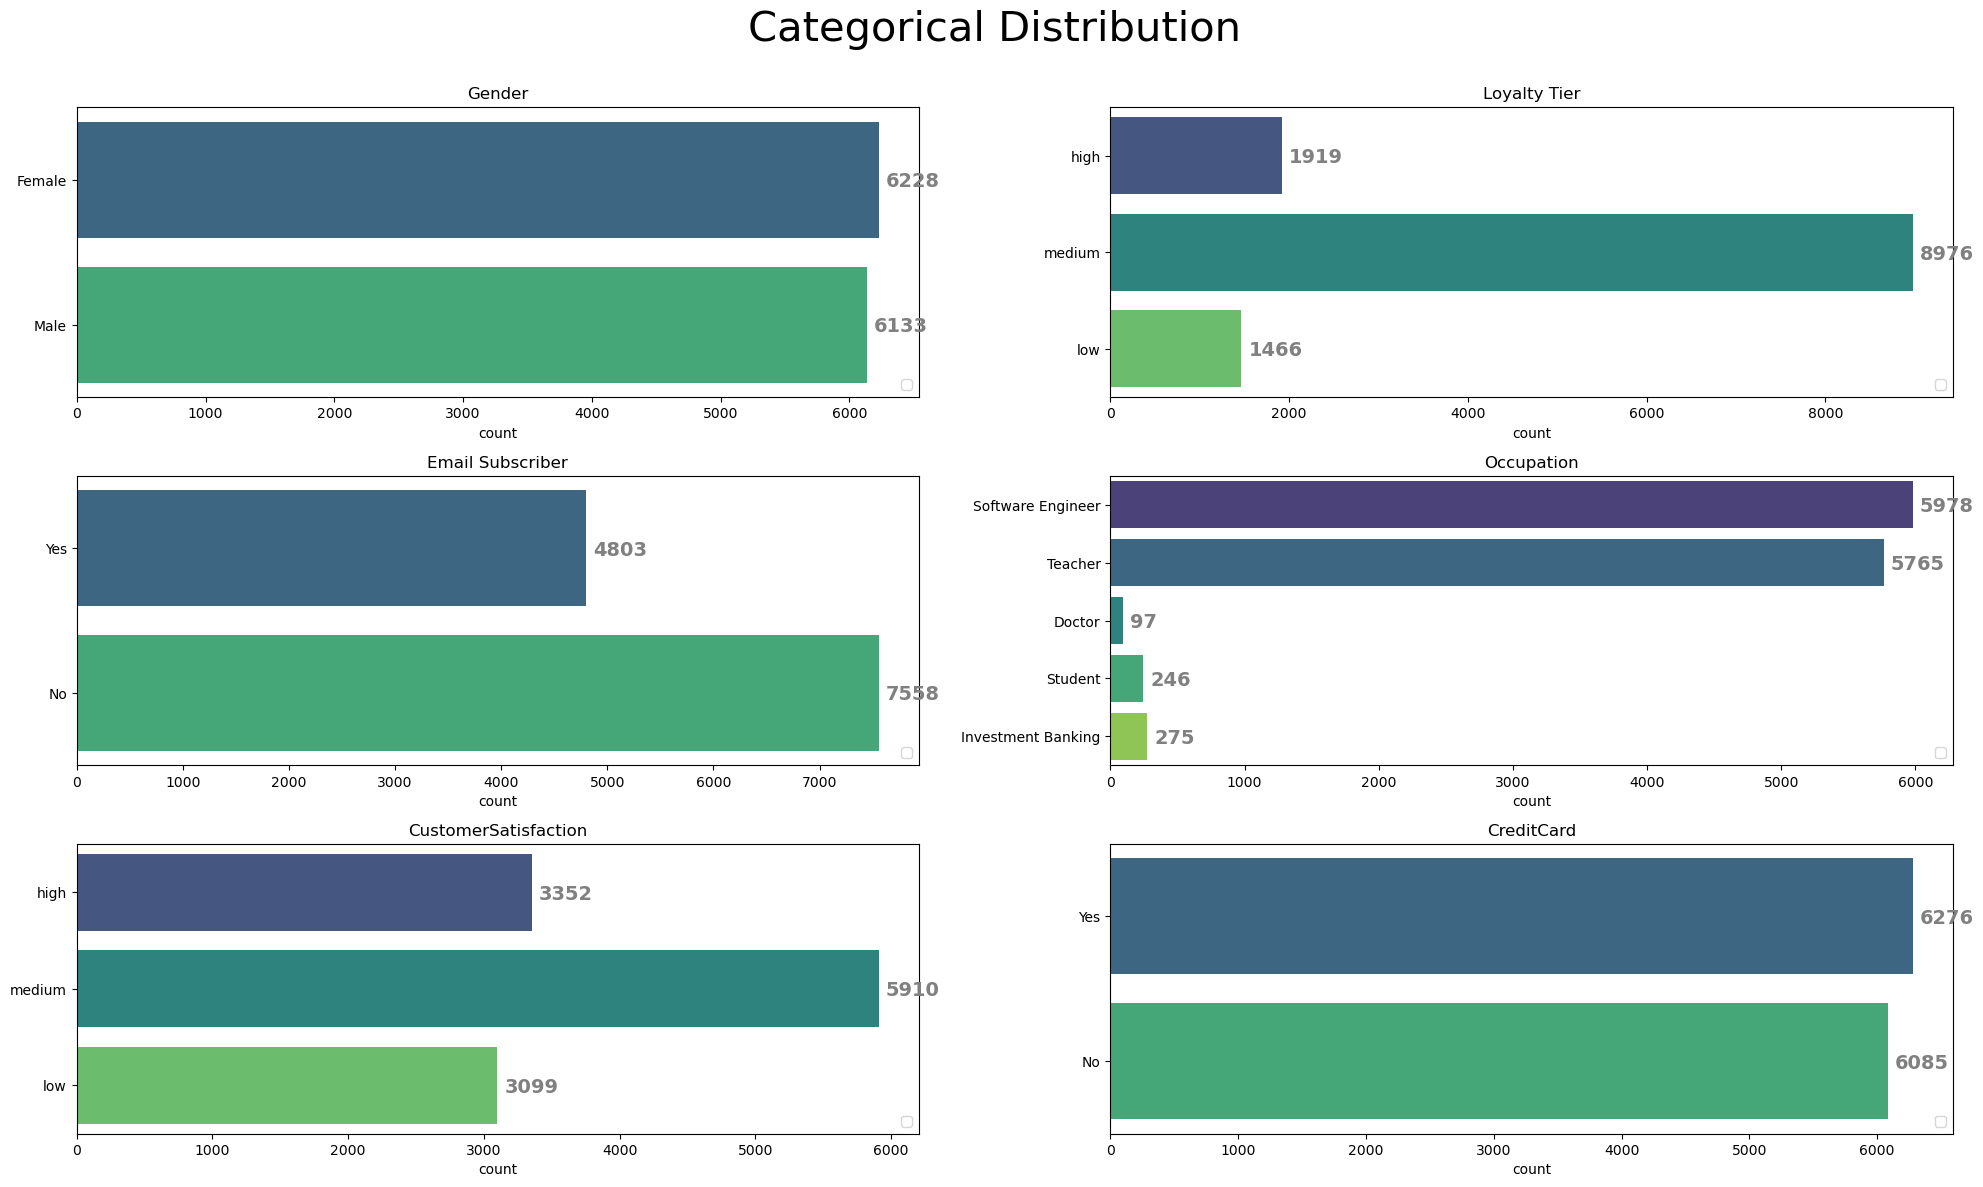

In [21]:
cat_cols = ['Gender', 'Loyalty Tier', 'Email Subscriber', 'Occupation', 'CustomerSatisfaction', 'CreditCard']

plt.figure(figsize=(20, 15))
plt.suptitle('Categorical Distribution', fontsize=30, y = 1.005)
for i in range(len(cat_cols)):
    plt.subplot(len(cat_cols)//2+1, 2, i+1)
    ax = sns.countplot(
        y = df[cat_cols[i]], palette='viridis'
    )
    ax.set_ylabel('')
    ax.set_title(cat_cols[i])
    
    for p in ax.patches:
        ax.annotate(
            format(p.get_width(), '.0f'),
            (p.get_width(), p.get_y() + p.get_height() / 2.), 
            ha = 'left',
            fontweight = "bold",
            xytext = (5,-5), 
            textcoords = 'offset points',
            color = 'gray', fontsize=14
        )
    ax.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

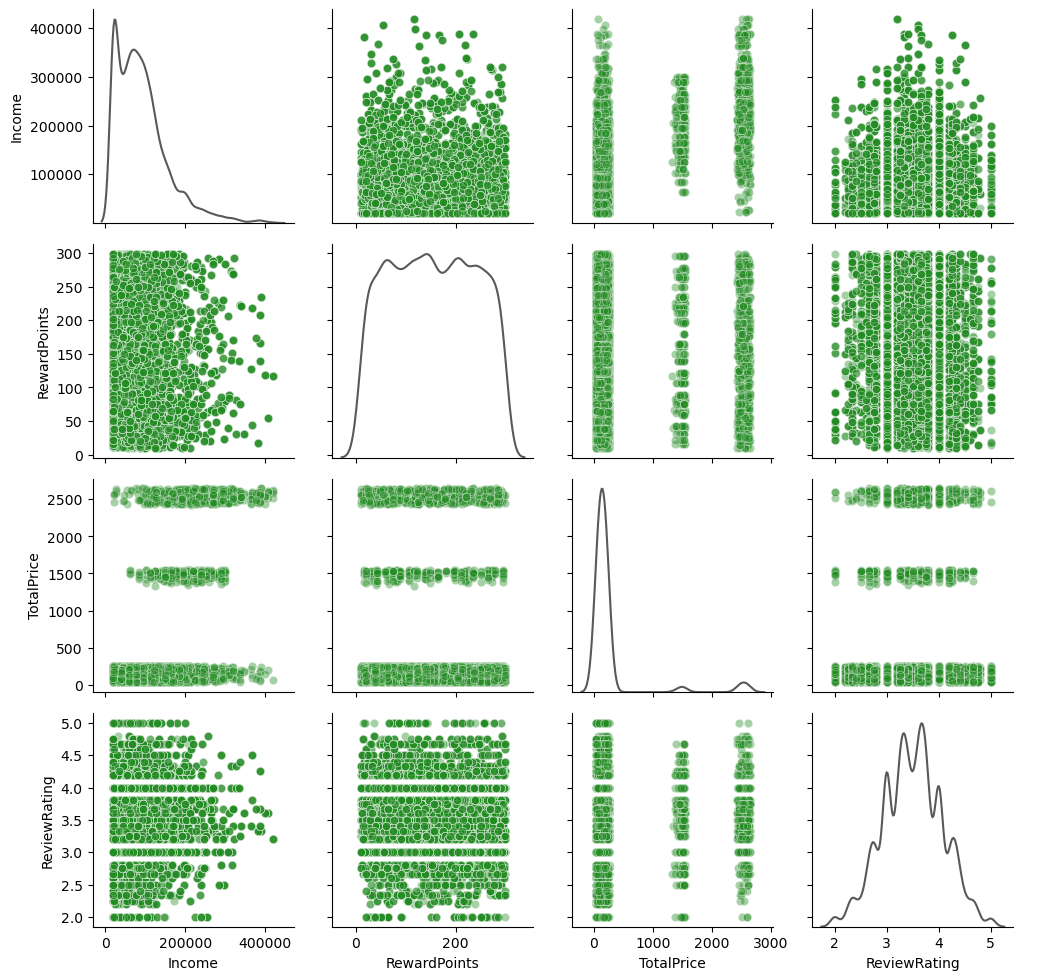

In [20]:
grid = sns.PairGrid(df, diag_sharey=False)

grid.map_offdiag(sns.scatterplot, alpha=0.4, color='#228B22')
grid.map_diag(sns.kdeplot, color='#595959')
grid.add_legend()

plt.show()